# Customer Churn Prediction using different Machine Learning Algorithms

In [116]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

In [117]:
#Importing DataSet
df = pd.read_csv('Customer-Churn-Prediction.csv')

In [118]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [119]:
df.shape

(7043, 21)

In [120]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

J:\ML\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

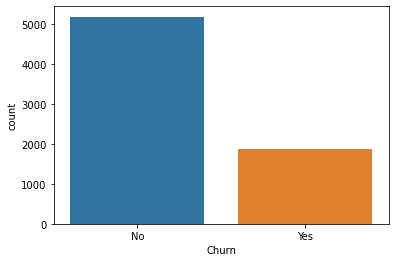

In [121]:
sns.countplot(df['Churn'])

In [122]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [123]:
churned = df[df.Churn == 'Yes'].shape[0]
retained = df[df.Churn == 'No'].shape[0]

In [124]:
#Customer Left the Company
cr_percentage = ((churned / (churned + retained)) * 100)

In [125]:
cr_percentage

26.536987079369588

In [126]:
retained = ((retained/(churned + retained)) * 100) #Not Left the Company or Stayed in the Company

In [127]:
retained

73.4630129206304

In [128]:
#Describe the Dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


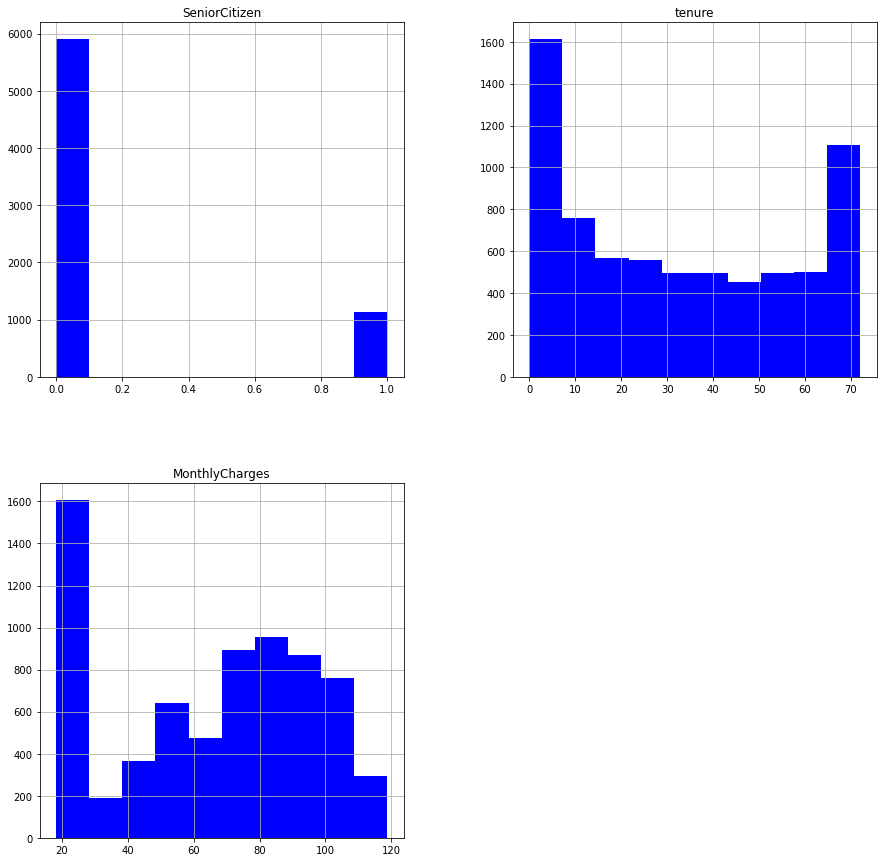

In [129]:
#Plotting the Dataset
df.hist(figsize = (15, 15),color = 'blue')
plt.show()

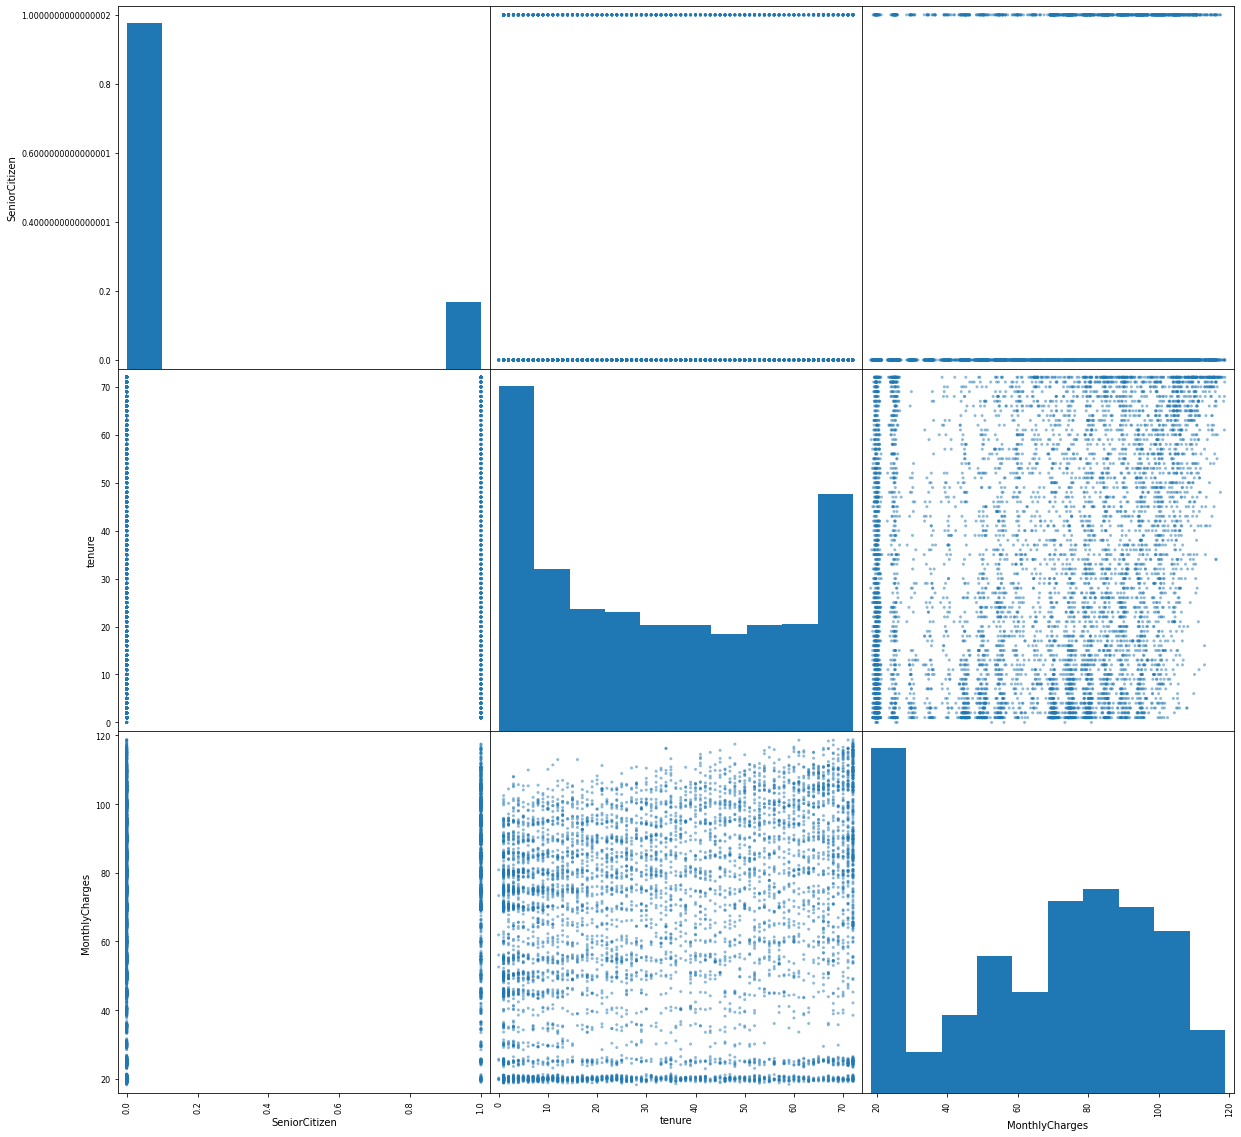

In [130]:
#Scattering the Plots
scatter_matrix(df, figsize = (20, 20))
plt.show()

In [131]:
#Correlation
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.01609,0.219856
tenure,0.016090,1.00000,0.247890
MonthlyCharges,0.219856,0.24789,1.000000


<AxesSubplot:>

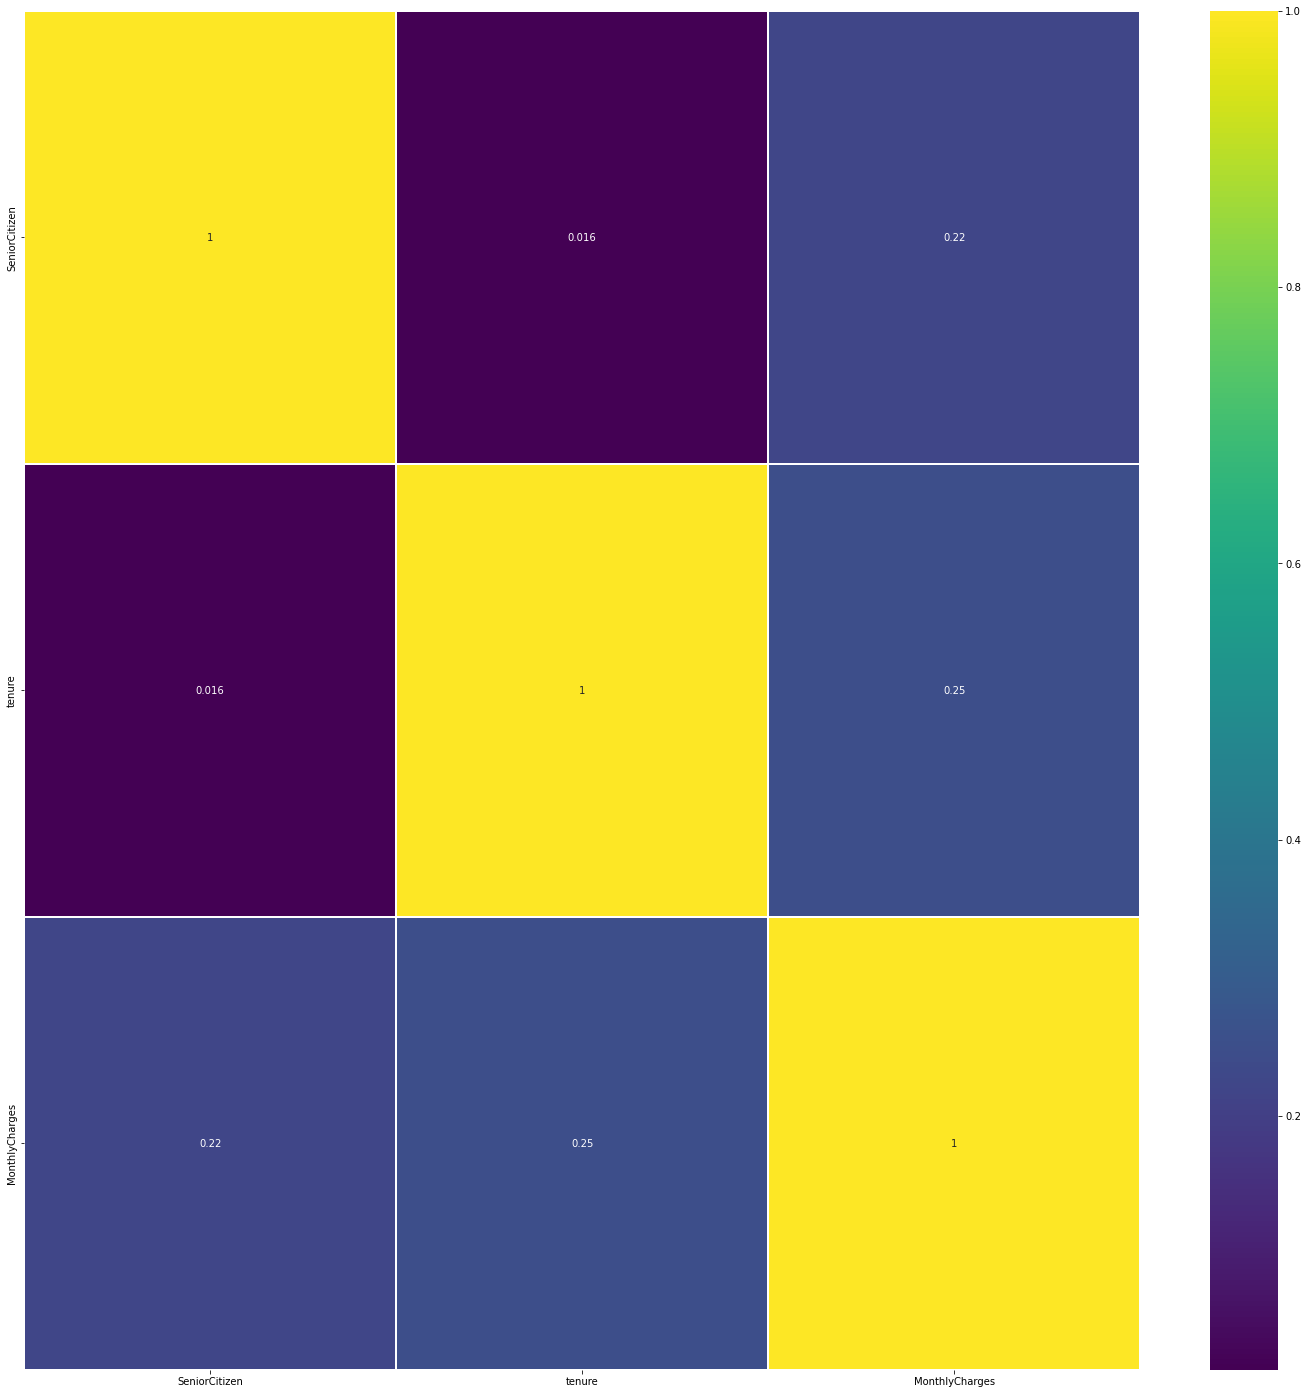

In [132]:
#Correlation Matrix Visualization
corrmat = df.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

# Visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

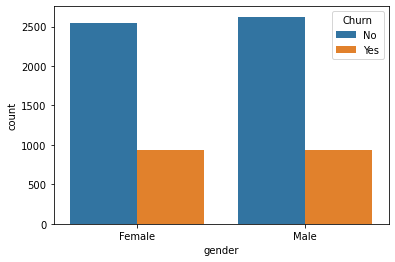

In [133]:
sns.countplot(data = df, x = 'gender', hue = 'Churn')

In [134]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

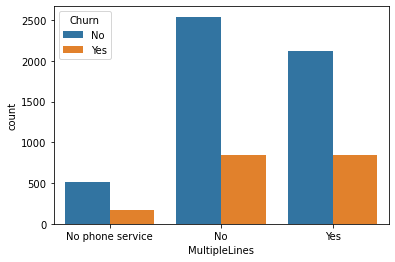

In [135]:
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn')

In [136]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

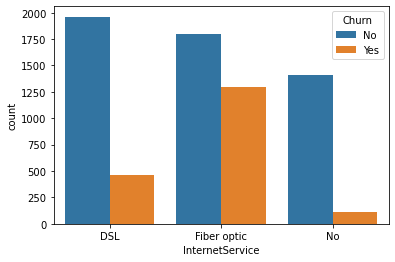

In [137]:
sns.countplot(data = df, x = 'InternetService', hue = 'Churn')

In [138]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

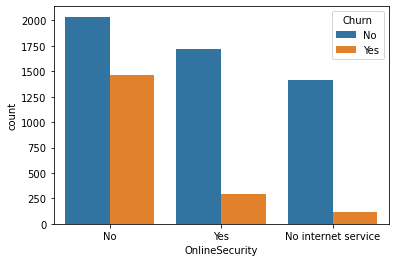

In [139]:
sns.countplot(data = df, x = 'OnlineSecurity', hue = 'Churn')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

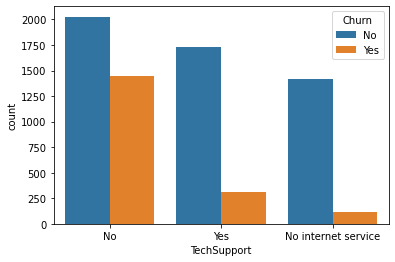

In [140]:
sns.countplot(data = df, x = 'TechSupport', hue = 'Churn')

# Preprocessing the DataSet

In [141]:
df = df.drop('customerID', axis = 'columns')

In [142]:
df.shape

(7043, 20)

# Applying Label Encoder

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
lr = LabelEncoder()

In [145]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = lr.fit_transform(df[column])

C:\Users\user\AppData\Local\Temp/ipykernel_14932/1658631797.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [146]:
df #New DAtaFrame

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


# Features and Labes Dividing

In [147]:
x = df.drop(['Churn'], axis = 1)

In [148]:
y = df['Churn']

# Scaling the Features

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
std = StandardScaler()

In [151]:
fx = std.fit_transform(x)

# Spliting the Dataset into Traning and Testing

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
xtrain, xtest, ytrain, ytest = train_test_split(fx, y, test_size = .30, random_state = 1)

# Building Logistic Regression Model

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
lr = LogisticRegression()

In [156]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [157]:
lr.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0])

In [158]:
lr.score(xtest, ytest)

0.8102224325603408

# Performance Metrics of Linear Regression Model

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
pred = lr.predict(xtest)

In [161]:
accuracy_score(ytest, pred)

0.8102224325603408

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
cm = confusion_matrix(ytest, pred)

In [164]:
print (cm)

[[1410  175]
 [ 226  302]]


Text(33.0, 0.5, 'Actual Label')

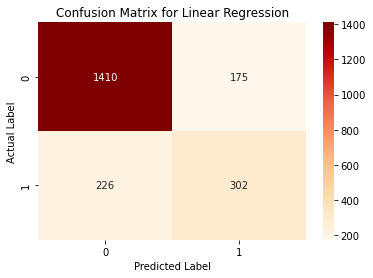

In [165]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for Linear Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [166]:
from sklearn.metrics import classification_report

In [167]:
cr = classification_report(ytest, pred)

In [168]:
print (cr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



# Building Decision Tree Model

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
dtc = DecisionTreeClassifier()

In [171]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [172]:
dtc.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
dtc.score(xtest, ytest)

0.7330809275911027

# Building Random Forest Model

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rfc = RandomForestClassifier()

In [176]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [177]:
rfc.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0])

In [178]:
rfc.score(xtest, ytest)

0.808329389493611

# Building Support Vector Machine Model

In [179]:
from sklearn.svm import SVC

In [180]:
svm = SVC()

In [181]:
svm.fit(xtrain, ytrain)

SVC()

In [182]:
svm.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
svm.score(xtest, ytest)

0.8069096071935636

# Building Gaussian Naive Bayes Model

In [184]:
from sklearn.naive_bayes import GaussianNB

In [185]:
gnb = GaussianNB()

In [186]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [187]:
gnb.predict(xtest)

array([0, 0, 1, ..., 1, 0, 0])

In [188]:
gnb.score(xtest, ytest)

0.763369616658779

# Building K-Nearest Neighbors Model

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
knn = KNeighborsClassifier()

In [191]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [192]:
knn.score(xtest, ytest)

0.7619498343587316

# Building Linear Discriminant Analysis Model

In [193]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [194]:
lda = LinearDiscriminantAnalysis()

In [195]:
lda.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

In [196]:
lda.score(xtrain, ytrain)

0.8

# Building Stochastic Gradient Descent Model

In [197]:
from sklearn.linear_model import SGDClassifier

In [198]:
sgd = SGDClassifier()

In [199]:
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [200]:
sgd.score(xtest, ytest)

0.79649787032655

# Building KMeans Model

In [201]:
from sklearn.cluster import KMeans

In [202]:
km = KMeans()

In [203]:
km.fit(xtrain, ytrain)

KMeans()

In [204]:
km.score(xtest, ytest)

-25611.297728946807

# Buiding Gradient Boosting Algorithm Model

In [205]:
from sklearn.ensemble import GradientBoostingClassifier

In [206]:
gbc = GradientBoostingClassifier()

In [207]:
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [208]:
gbc.score(xtest, ytest)

0.812588736393753

# Buiding AdaBoosting Algorithm Model

In [209]:
from sklearn.ensemble import AdaBoostClassifier

In [210]:
aba = AdaBoostClassifier()

In [211]:
aba.fit(xtrain, ytrain)

AdaBoostClassifier()

In [212]:
aba.score(xtest, ytest)

0.8121154756270705